In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=02b45d3a2547bdfe7469399d1ef3b8d10d1d238fd91b72dd7d9cc7791ad70056
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 97 kB 6.1 MB/s             
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=553bf7f5fcf027705a75773220e1371fff4491674a907010779a2422190065c0
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots 


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
Tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = Tesla.history(period = "max")

In [6]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [8]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2021 | TSLA | MacroTrends</title>]

In [9]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [10]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [11]:
tesla_revenue.tail()

,Date,Revenue
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


In [12]:
GameStop = yf.Ticker("GME")

In [13]:
gme_data = GameStop.history(period = 'max')

In [14]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480514,6.773400,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


In [15]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2010-2021 | GME | MacroTrends</title>]

In [17]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [18]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
47,2010-01-31,3524
48,2009-10-31,1835
49,2009-07-31,1739
50,2009-04-30,1981
51,2009-01-31,3492


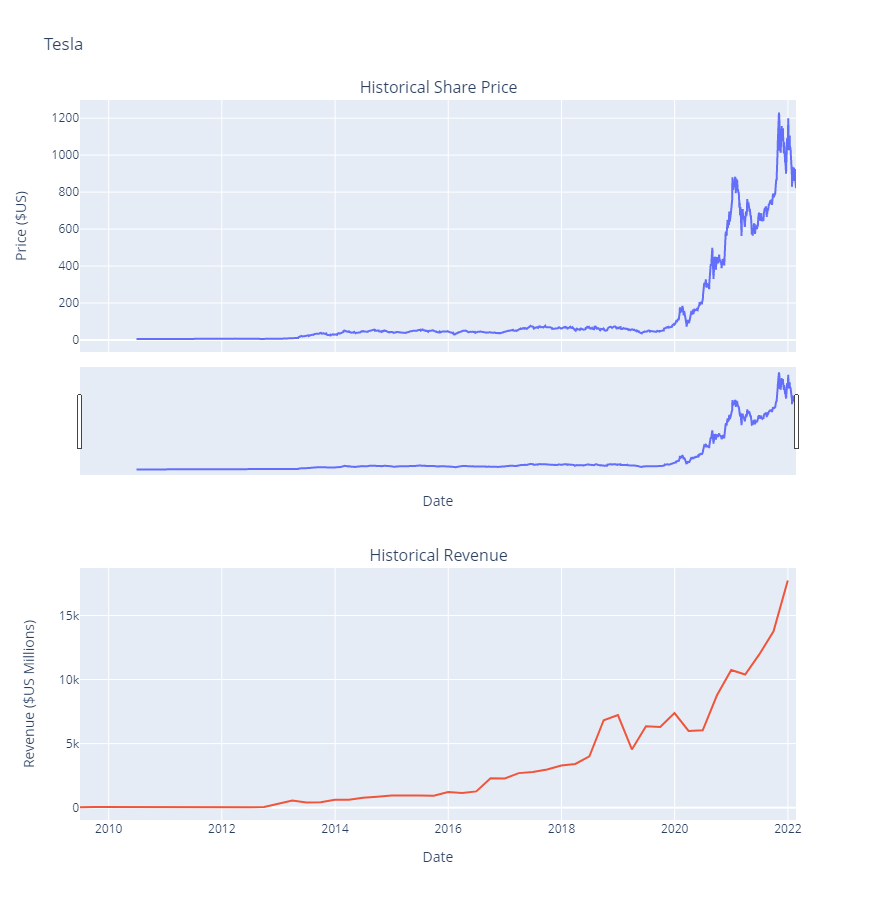

In [20]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

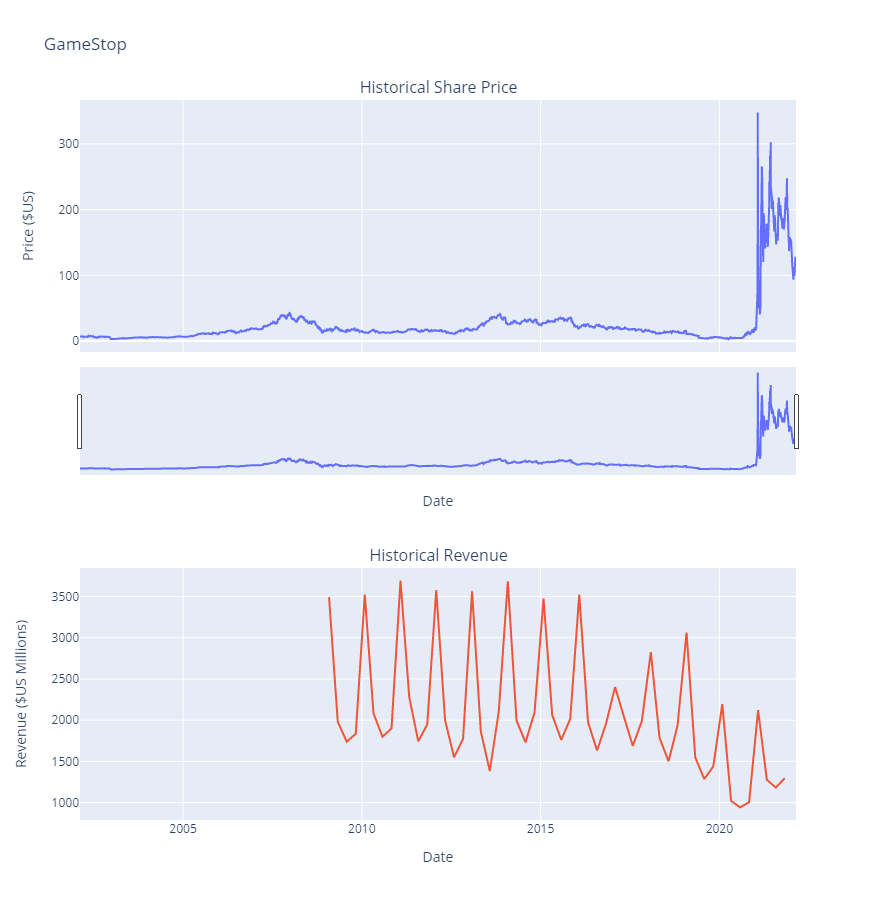

In [21]:
make_graph(gme_data, gme_revenue, 'GameStop')